<a href="https://colab.research.google.com/github/ellahn3/Hackathon-CrimeSeen/blob/main/CrimeSeenRun.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

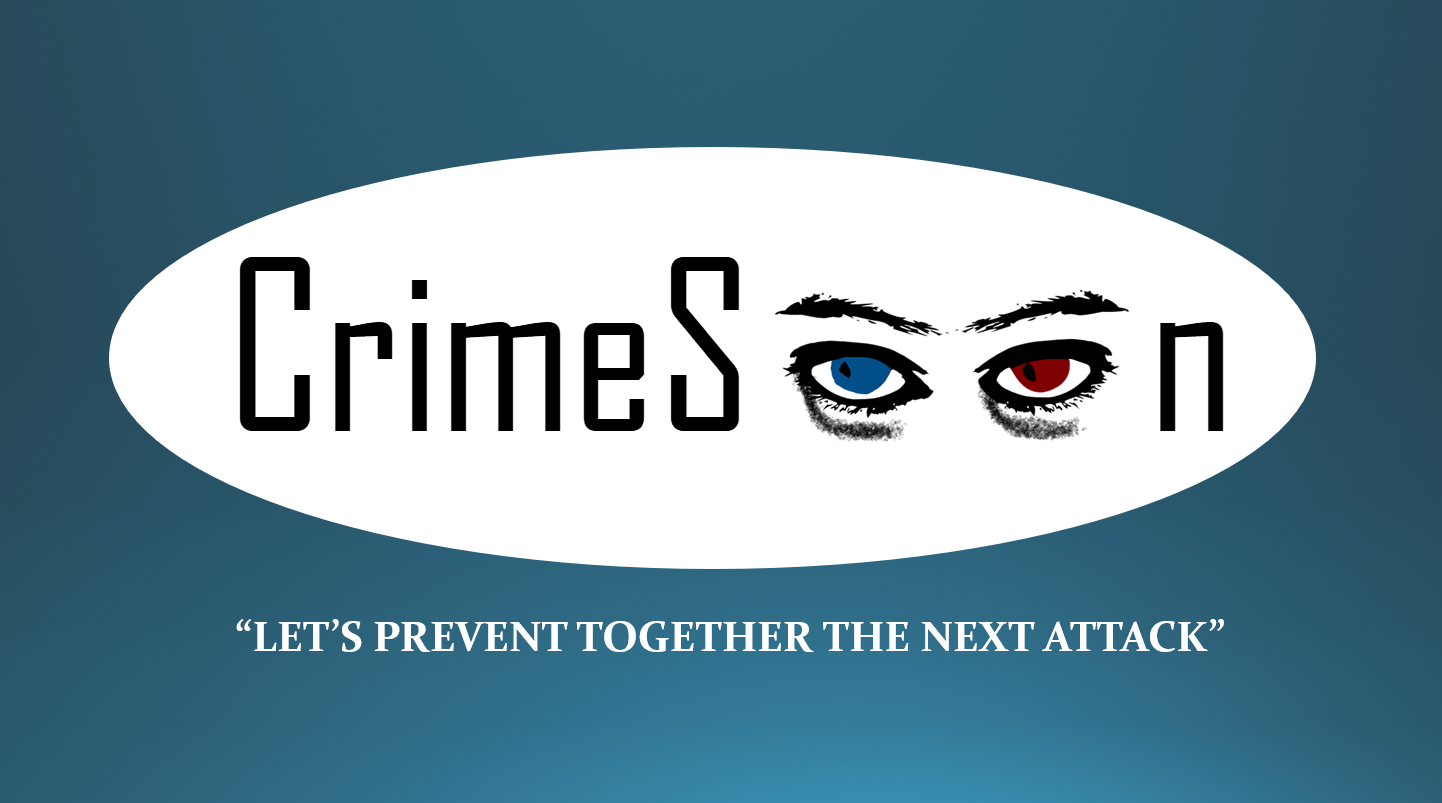

# Crim seen
##Selected issue:
Security bodies around the world and the Israel Police in particular are constantly engaged in maintaining public safety. One of the significant challenges in this task is the early detection of ammunition. There are many means of detection such as magnetometers and more but security officials do not always want the means to be visible.

##Defining the solution:
Weapon identification by thermal camera along with facial identification by another camera, which checks whether the person is in an existing pool of police faces of criminals who have a criminal record. In the event that a match is found, a warning will be sent to police officials.

### DATA:

The data contain 2 thypes of infrared images 

1- infrared images whit gun

2- infrared images whitout gun

3-criminal faces


### face recognition:

unknown image=> model for infrared images=>face recognition


# librarys

In [2]:
!pip install face_recognition
!pip install colorama 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 100.1 MB 27 kB/s 
  Created wheel for face-recognition-models: filename=face_recognition_models-0.3.0-py2.py3-none-any.whl size=100566186 sha256=362f0d83a927b0d47d598a5c517a2ebd3be4866593c431d44d405fbab98fe85f
  Stored in directory: /root/.cache/pip/wheels/d6/81/3c/884bcd5e1c120ff548d57c2ecc9ebf3281c9a6f7c0e7e7947a
Successfully built face-recognition-models
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [1]:
from google.colab import drive
drive.mount('/content/gdrive')
!ls gdrive/MyDrive/bioinformatic  # use !ls to navigate in your drive


Mounted at /content/gdrive
ls: cannot access 'gdrive/MyDrive/bioinformatic': No such file or directory


In [3]:
#Import libraries
from __future__ import absolute_import, division, print_function, unicode_literals

from tensorflow import keras
from keras.preprocessing.image import ImageDataGenerator, load_img
import matplotlib.pylab as plt
import tensorflow as tf
import tensorflow_hub as hub
import numpy as np
import matplotlib.pylab as plt
import os
from tensorflow.keras.callbacks import ModelCheckpoint
from keras.callbacks import EarlyStopping
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import f1_score,recall_score,accuracy_score,precision_score

# Data

In [6]:
train_ds='/content/gdrive/MyDrive/hakaton/Data/train'
test_ds='/content/gdrive/MyDrive/hackaton/Data/test'
val_ds='/content/gdrive/MyDrive/hakaton/Data/val'


In [7]:
test_with_gun=os.listdir(test_ds+'/with_gun')
test_without_gun=os.listdir(test_ds+'/without_gun')
print('test size test_with_gun ',len(test_with_gun))
print('test size test_without_gun ',len(test_without_gun))

test size test_with_gun  31
test size test_without_gun  33


In [ ]:
print('trian size with_gun',len(os.listdir(train_ds+'/with_gun')))
print('trian size without_gun',len(os.listdir(train_ds+'/without_gun')))


trian size with_gun 100
trian size without_gun 100


# Prediction

In [ ]:
y_pred=[]
model = keras.models.load_model('/content/gdrive/MyDrive/hakaton/model5ep')
'''This function loads an image'''
def prepare_img(img, img_width, img_height,channels):
    img =  tf.keras.preprocessing.image.img_to_array(img)
    img = img.reshape(1, img_width, img_height, channels).astype('float32')
    img = img / 255.0
    return img


for img in test_with_gun:
    img = load_img('/content/gdrive/MyDrive/hakaton/Data/test/with_gun/' + img ,target_size=(224, 224))
    img = prepare_img(img,224,224,3)
    predictions = model.predict(img)
    index_of_higher_value  = predictions[0].argmax()
    y_pred.append(predictions[0].argmax())

for img in test_without_gun:
    img = load_img('/content/gdrive/MyDrive/hakaton/Data/test/without_gun/' + img ,target_size=(224, 224))
    img = prepare_img(img,224,224,3)
    predictions = model.predict(img)
    index_of_higher_value  = predictions[0].argmax()
    y_pred.append(predictions[0].argmax())


    

In [ ]:
y_test=[0]*len(test_with_gun)
y_test+=[1]*len(test_without_gun)
print('Accuracy: ',round(accuracy_score(y_test, y_pred),2))
print('Recall: ',round(recall_score(y_test, y_pred,average='weighted'),2))
print('Precision: ',round(precision_score(y_test, y_pred,average='weighted'),2))
print('f1 score :',round(f1_score(y_test,y_pred, average='weighted'),2))

print(classification_report(y_test, y_pred))

Accuracy:  0.98
Recall:  0.98
Precision:  0.99
f1 score : 0.98
              precision    recall  f1-score   support

           0       1.00      0.97      0.98        32
           1       0.97      1.00      0.99        33

    accuracy                           0.98        65
   macro avg       0.99      0.98      0.98        65
weighted avg       0.99      0.98      0.98        65



# face recognition

In [8]:
import face_recognition
import cv2
import os
import glob
import numpy as np

class SimpleFacerec:
    def __init__(self):
        self.known_face_encodings = []
        self.known_face_names = []

        # Resize frame for a faster speed
        self.frame_resizing = 0.25

    def load_encoding_images(self, images_path):
        """
        Load encoding images from path
        :param images_path:
        :return:
        """
        # Load Images
        images_path = glob.glob(os.path.join(images_path, "*.*"))
        # Store image encoding and names
        for img_path in images_path:
            img = cv2.imread(img_path)
            rgb_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

            # Get the filename only from the initial file path.
            basename = os.path.basename(img_path)
            (filename, ext) = os.path.splitext(basename)
            # Get encoding
            img_encoding = face_recognition.face_encodings(rgb_img)[0]

            # Store file name and file encoding
            self.known_face_encodings.append(img_encoding)
            self.known_face_names.append(filename)

    def detect_known_faces(self, frame):
        small_frame = cv2.resize(frame, (0, 0), fx=self.frame_resizing, fy=self.frame_resizing)
        # Find all the faces and face encodings in the current frame of video
        # Convert the image from BGR color (which OpenCV uses) to RGB color (which face_recognition uses)
        rgb_small_frame = cv2.cvtColor(small_frame, cv2.COLOR_BGR2RGB)
        face_locations = face_recognition.face_locations(rgb_small_frame)
        face_encodings = face_recognition.face_encodings(rgb_small_frame, face_locations)

        face_names = []
        for face_encoding in face_encodings:
            # See if the face is a match for the known face(s)
            matches = face_recognition.compare_faces(self.known_face_encodings, face_encoding)
            name = "Unknown"

            # # If a match was found in known_face_encodings, just use the first one.
            # if True in matches:
            #     first_match_index = matches.index(True)
            #     name = known_face_names[first_match_index]

            # Or instead, use the known face with the smallest distance to the new face
            face_distances = face_recognition.face_distance(self.known_face_encodings, face_encoding)
            best_match_index = np.argmin(face_distances)
            if matches[best_match_index]:
                name = self.known_face_names[best_match_index]
            face_names.append(name)

        # Convert to numpy array to adjust coordinates with frame resizing quickly
        face_locations = np.array(face_locations)
        face_locations = face_locations / self.frame_resizing
        return face_locations.astype(int), face_names




In [10]:
from keras.preprocessing.image import img_to_array
import colorama
from colorama import Fore
my_temp=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31]
def prepare_img(img, img_width, img_height,channels):
    img =  tf.keras.preprocessing.image.img_to_array(img)
    img = img.reshape(1, img_width, img_height, channels).astype('float32')
    img = img / 255.0
    return img
def crimeseen(num):
  category=''
  if num in my_temp:
    category = 'with_gun'
    sample='/content/gdrive/MyDrive/hackaton/Data/test/with_gun/'+str(num)+'.jpg'
  else:
    category = 'without_gun'
    sample='/content/gdrive/MyDrive/hackaton/Data/test/without_gun/n'+str(num)+'.jpg'
  arr=sample.split('/')
  model = keras.models.load_model('/content/gdrive/MyDrive/hackaton/model5ep')
  img = load_img(sample ,target_size=(224, 224))
  image = prepare_img(img,224,224,3)
  predictions = model.predict(image)
  index_of_higher_value  = predictions[0].argmax()
  if index_of_higher_value == 0:# Encode faces from a folder
    sfr = SimpleFacerec() 
    sfr.load_encoding_images("/content/gdrive/MyDrive/hackaton/Data/faces/criminals/")
    frame =plt.imread("/content/gdrive/MyDrive/hackaton/Data/faces/random/"+arr[-1])# Detect Faces
    face_locations, face_names = sfr.detect_known_faces(frame)
    for face_loc, name in zip(face_locations, face_names):
          y1, x2, y2, x1 = face_loc[0], face_loc[1], face_loc[2], face_loc[3]
          cv2.putText(frame, name,(x1, y1 - 10), cv2.FONT_HERSHEY_DUPLEX, 2, (0, 0, 200), 2)
          cv2.rectangle(frame, (x1, y1), (x2, y2), (0, 0, 200), 4)
    if name !="Unknown":print(Fore.RED +"ALERT!ALERT! "+name+" is not supposed to walk around with a gun\n\n\n")
    else:print("Has a gun but is not a known criminal\n\n")
    plt.imshow(frame)
    plt.show()
    plt.imshow(img)
    plt.show()
  else:
      print("without gun no need to continue with face recognition:) ")
      plt.imshow(img)

# Official Run

Selecting a number signifies the second the image was recorded


give me a random number [1-62]

9
ALERT!ALERT! the god father gen2 is not supposed to walk around with a gun





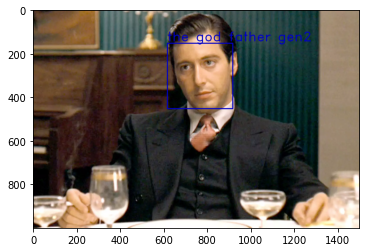

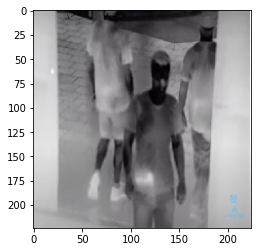

In [12]:
my_time=input("\ngive me a random number [1-62]\n\n")
crimeseen(int(my_time))


give me a random number [1-62]

11
ALERT!ALERT! Kim is not supposed to walk around with a gun





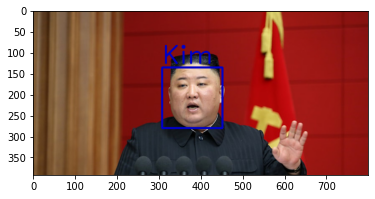

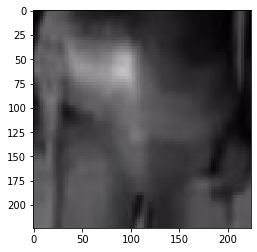

In [13]:
my_time=input("\ngive me a random number [1-62]\n\n")
crimeseen(int(my_time))


give me a random number [1-62]

40
without gun no need to continue with face recognition:) 


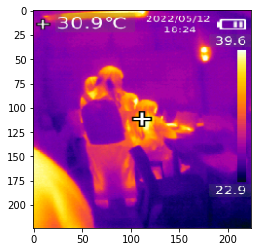

In [14]:
my_time=input("\ngive me a random number [1-62]\n\n")
crimeseen(int(my_time))


give me a random number [1-62]

15
ALERT!ALERT! jeffrey is not supposed to walk around with a gun





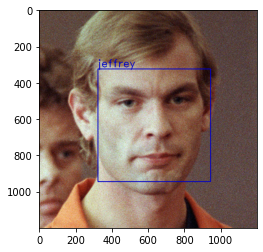

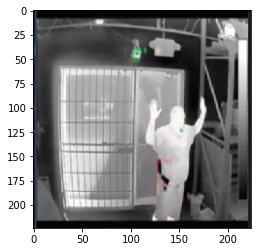

In [19]:
my_time=input("\ngive me a random number [1-62]\n\n")
crimeseen(int(my_time))


give me a random number [1-62]

29
Has a gun but is not a known criminal




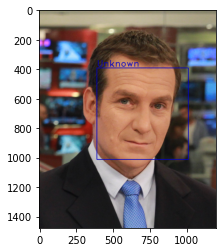

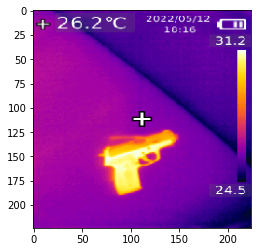

In [18]:
my_time=input("\ngive me a random number [1-62]\n\n")
crimeseen(int(my_time))